In [1]:
# 1. 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:

# 2. 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# 정규화 (0~1 범위로)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:

# 채널 차원 추가 (CNN 입력 형태 맞추기)
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]


In [5]:

# 라벨 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [6]:

# 3. CNN 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:

# 5. 모델 학습
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.8240 - loss: 0.6017 - val_accuracy: 0.9742 - val_loss: 0.0911
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.9833 - val_loss: 0.0563
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9856 - val_loss: 0.0472
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.9882 - loss: 0.0378 - val_accuracy: 0.9869 - val_loss: 0.0411
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9866 - val_loss: 0.0457
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.9946 - loss: 0

In [9]:

# 6. 테스트셋 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9865 - loss: 0.0413
Test accuracy: 0.9901


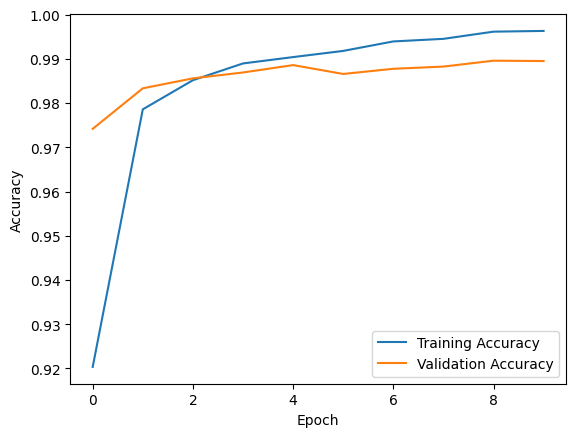

In [10]:


# 7. 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
